<a href="https://colab.research.google.com/github/neel26desai/cmpe255_assignment2/blob/main/Multi_Class_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Remember to Trun on GPU in the colab session before running

In [ ]:
!pip install pycaret[full]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# check installed version
import pycaret
pycaret.__version__

'3.0.4'

We will be using the a Wine dataset which used features like acidity, sugar, cholrides etc, to predict the quality of the red wine.

Dataset: "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

In [4]:
import pandas as pd
from pycaret.classification import ClassificationExperiment, load_model, predict_model

In [2]:
# URLs to the dataset (available in the UCI repository)
red_wine_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
white_wine_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"


In [5]:
data = pd.read_csv(red_wine_url,sep=";")

In [6]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
#initialie a classification experiment
exp = ClassificationExperiment()

In [9]:
# init setup on exp
exp.setup(data, target = 'quality', session_id = 123, use_gpu=True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

,Description,Value
0,Session id,123
1,Target,quality
2,Target type,Multiclass
3,Target mapping,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5"
4,Original data shape,"(1599, 12)"
5,Transformed data shape,"(1599, 12)"
6,Transformed train set shape,"(1119, 12)"
7,Transformed test set shape,"(480, 12)"
8,Numeric features,11
9,Preprocess,True


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

In [10]:
#let us compare baseline models
baseline_model = exp.compare_models

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.6702,0.5871,0.6702,0.6485,0.6494,0.4612,0.4667,0.5790
rf,Random Forest Classifier,0.6595,0.5761,0.6595,0.6323,0.6388,0.4444,0.4500,0.9760
xgboost,Extreme Gradient Boosting,0.6569,0.5719,0.6569,0.6384,0.6427,0.4495,0.4530,1.0660
catboost,CatBoost Classifier,0.6506,0.5708,0.6506,0.6285,0.6338,0.4353,0.4398,13.3610
lightgbm,Light Gradient Boosting Machine,0.6497,0.5725,0.6497,0.6277,0.6342,0.4365,0.4403,1.6900
gbc,Gradient Boosting Classifier,0.6336,0.5463,0.6336,0.6173,0.6219,0.4151,0.4173,3.0280
lr,Logistic Regression,0.6032,0.5297,0.6032,0.5717,0.5746,0.3422,0.3483,0.4310
lda,Linear Discriminant Analysis,0.5987,0.5329,0.5987,0.5806,0.5845,0.3558,0.3586,0.1740
ridge,Ridge Classifier,0.5880,0.0000,0.5880,0.4973,0.5318,0.2989,0.3103,0.1150
dt,Decision Tree Classifier,0.5872,0.4659,0.5872,0.5837,0.5821,0.3556,0.3572,0.1190


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [11]:
baseline_model = catboost_model

In [12]:
baseline_model

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

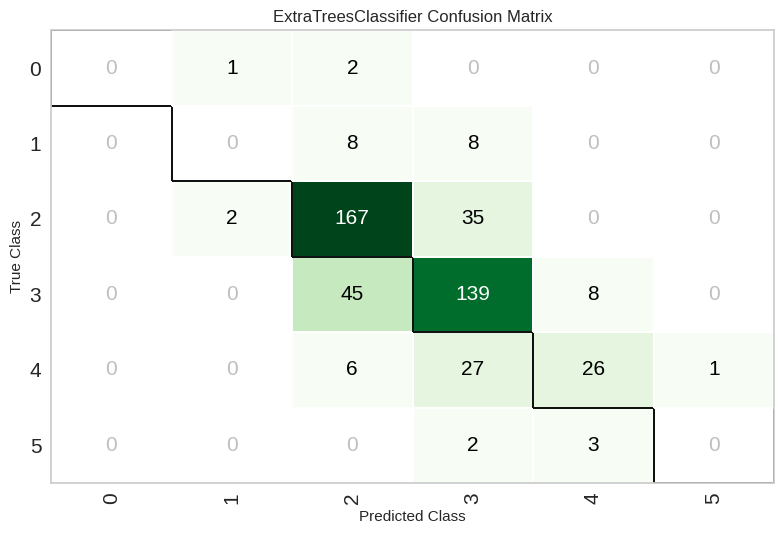

In [20]:
exp.plot_model(baseline_model,'confusion_matrix')

In [13]:
#let see how good the baseline model on unseen data
baseline_pred = exp.predict_model(baseline_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.6917,0.8583,0.6917,0.6626,0.6715,0.4965,0.5002


In [14]:
# the accuracy, precision and recall are not upto the mark. So lets try to perform hyperparameter tunning to see if we can imporve performance

In [15]:
tree_classifier_tuner = exp.tune_model(baseline_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5893,0.0000,0.5893,0.5780,0.5646,0.3111,0.3175
1,0.5893,0.0000,0.5893,0.5324,0.5459,0.3054,0.3132
2,0.5714,0.7539,0.5714,0.5074,0.5327,0.2820,0.2871
3,0.6429,0.7866,0.6429,0.6466,0.5944,0.3972,0.4166
4,0.5893,0.7867,0.5893,0.5534,0.5463,0.3098,0.3197
5,0.6518,0.7835,0.6518,0.6334,0.6233,0.4221,0.4310
6,0.5804,0.7795,0.5804,0.5884,0.5479,0.2946,0.3029
7,0.6071,0.7826,0.6071,0.5805,0.5688,0.3410,0.3495
8,0.5625,0.7549,0.5625,0.5799,0.5270,0.2628,0.2703


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [18]:
tree_classifier_tuner

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

In [17]:
#lets check how the performance is for the tuned mode, on unseen data
tuned_pred = exp.predict_model(tree_classifier_tuner)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.6917,0.8583,0.6917,0.6626,0.6715,0.4965,0.5002


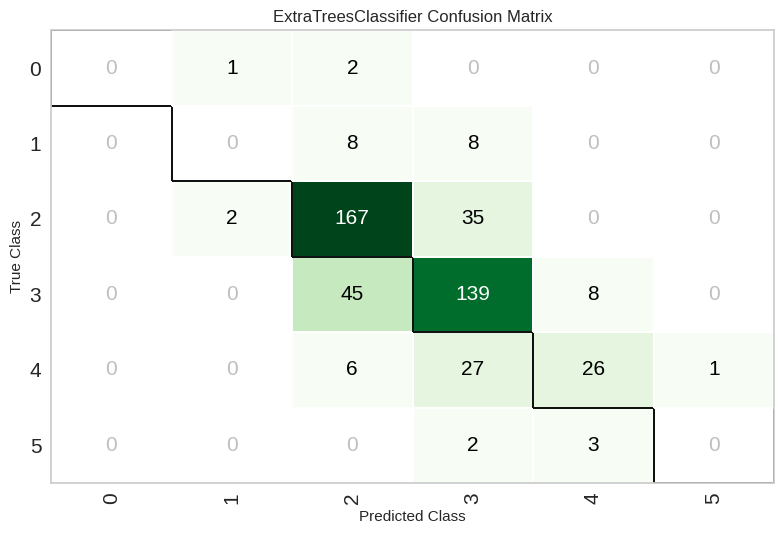

In [21]:
exp.plot_model(tree_classifier_tuner,'confusion_matrix')

In [22]:
#after hyperparameter tunning we found that even after optimizing the classifier we weren't able to imporve the perfomance

In [23]:
#lets venture int too looking at different variants of XGBoost to check if we can improve

In [24]:
xgb = exp.create_model('xgboost',tree_method='gpu_hist')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6161,0.0000,0.6161,0.5975,0.6053,0.3835,0.3853
1,0.6696,0.0000,0.6696,0.6540,0.6614,0.4782,0.4785
2,0.6339,0.8072,0.6339,0.6378,0.6300,0.4213,0.4265
3,0.6875,0.8356,0.6875,0.6502,0.6630,0.4927,0.4971
4,0.6429,0.7978,0.6429,0.6257,0.6293,0.4229,0.4270
5,0.6518,0.7936,0.6518,0.6303,0.6396,0.4521,0.4537
6,0.6696,0.8260,0.6696,0.6704,0.6570,0.4653,0.4705
7,0.7054,0.8646,0.7054,0.6658,0.6809,0.5262,0.5324
8,0.5982,0.7937,0.5982,0.5834,0.5814,0.3442,0.3478


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [25]:
xgb

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [26]:
# lets see how well it performs on unseen data
xgb_pred = exp.predict_model(xgb)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.6292,0.8274,0.6292,0.6016,0.6148,0.4062,0.4072


In [27]:
#the standard xgb model is performing worse the our Tree classifier which was at 69% accuracy
#lets see if we can hyperparameter tune to make the performance better

In [28]:
xgb_tuned= exp.tune_model(xgb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6518,0.0000,0.6518,0.6345,0.6407,0.4386,0.4412
1,0.6518,0.0000,0.6518,0.6179,0.6325,0.4333,0.4361
2,0.5893,0.7927,0.5893,0.5862,0.5837,0.3427,0.3451
3,0.6696,0.8167,0.6696,0.6358,0.6456,0.4607,0.4658
4,0.6250,0.7964,0.6250,0.5975,0.6074,0.3904,0.3936
5,0.6250,0.7855,0.6250,0.6029,0.6103,0.3960,0.4004
6,0.6696,0.8131,0.6696,0.6391,0.6474,0.4638,0.4725
7,0.6786,0.8517,0.6786,0.6417,0.6573,0.4832,0.4861
8,0.6161,0.7871,0.6161,0.5947,0.5957,0.3700,0.3745


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [29]:
# the orignal model was better than the tuned one

In [30]:
# Looks like its not the algo but something else which automl has not been able to correct

In [31]:
#let us check for class imbalance

In [35]:
#cecking the count of each class in our data
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [36]:
# we can seee there is clearly a class imabalance, let us adress it

In [37]:
# Using SMOTE to fix class imbalance
from imblearn.over_sampling import SMOTE

In [38]:
exp2 = ClassificationExperiment()

In [40]:
exp2.setup(data, target='quality', fix_imbalance=True, fix_imbalance_method=SMOTE(),use_gpu=True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

,Description,Value
0,Session id,6722
1,Target,quality
2,Target type,Multiclass
3,Target mapping,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5"
4,Original data shape,"(1599, 12)"
5,Transformed data shape,"(3342, 12)"
6,Transformed train set shape,"(2862, 12)"
7,Transformed test set shape,"(480, 12)"
8,Numeric features,11
9,Preprocess,True


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

In [41]:
#compare the baseline models on it
baseline_model_2= exp2.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6228,0.5822,0.6228,0.6444,0.6276,0.4281,0.4317,1.3560
catboost,CatBoost Classifier,0.6184,0.5669,0.6184,0.6322,0.6210,0.4172,0.4197,13.1070
et,Extra Trees Classifier,0.6175,0.5835,0.6175,0.6387,0.6228,0.4184,0.4214,0.9410
xgboost,Extreme Gradient Boosting,0.6157,0.5636,0.6157,0.6283,0.6176,0.4115,0.4139,1.0320
lightgbm,Light Gradient Boosting Machine,0.6148,0.5679,0.6148,0.6175,0.6120,0.4038,0.4062,1.7750
gbc,Gradient Boosting Classifier,0.5540,0.5388,0.5540,0.5849,0.5637,0.3330,0.3361,7.3840
dt,Decision Tree Classifier,0.5424,0.4703,0.5424,0.5754,0.5522,0.3213,0.3248,0.1250
qda,Quadratic Discriminant Analysis,0.4683,0.4848,0.4683,0.5477,0.4886,0.2472,0.2566,0.1220
lda,Linear Discriminant Analysis,0.4263,0.5078,0.4263,0.5705,0.4774,0.2243,0.2345,0.2500
lr,Logistic Regression,0.3915,0.4998,0.3915,0.5557,0.4484,0.1927,0.2037,1.2420


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [42]:
baseline_model_2

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=6722, verbose=0, warm_start=False)

In [43]:
#checking how well is the model performing on unseen data
baseline_model_2_pred = exp2.predict_model(baseline_model_2
                                          )

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.6458,0.8433,0.6458,0.6593,0.6498,0.4638,0.4653


In [44]:
#even after addressing the class imbalance we were not able to improve the models performace

Reference:
[1] https://github.com/pycaret/pycaret/blob/master/tutorials/Tutorial%20-%20Multiclass%20Classification.ipynb
